# **Machine Learning with Python**

## Exercise 1.3: Optimization in Relation to Problem-Solving (Step-by-step)

### **Contents**

##### 1) Importing libraries and data set
##### 2) Reduce data set to one year of data
##### 3) Select a weather station
##### 4) Temperature over the chosen year in the chosen weather station
##### 5) Loss function
##### 6) Gradient descent function
##### 7) Loss function (viz)
##### 8) Rerunning optimization + Loss function (viz)

#### **1) Importing libraries and data set**

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go
import calendar

In [2]:
# Create a path to where your data is stored.

path = r'C:\Users\andd0\Documents\Machine Learning with Python'

In [3]:
# Read in the European weather data.

climate = pd.read_csv(os.path.join(path, 'Main folder', '02 Data sets', 'Original data set', 'Dataset-weather-prediction-dataset-processed.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [4]:
# Reduce to just the mean temperatures

df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [5]:
df

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,19600101,1,6.5,3.7,2.4,9.3,10.0,0.8,10.6,7.9,-0.6,9.5,7.6,6.9,4.9,7.8,-5.9,4.2,10.0,8.5
1,19600102,1,6.1,2.9,2.3,7.7,8.2,1.6,6.1,7.7,2.1,8.6,9.8,6.2,3.4,12.2,-9.5,4.0,9.5,8.9
2,19600103,1,8.5,3.1,2.7,6.8,7.1,0.7,8.4,6.5,4.6,6.9,8.6,5.8,1.9,10.2,-9.5,2.4,10.3,10.5
3,19600104,1,6.3,2.0,2.0,6.7,6.8,-0.1,9.4,5.8,3.2,7.0,10.3,3.9,3.0,10.8,-11.5,1.2,11.2,7.4
4,19600105,1,3.0,2.0,2.5,8.0,7.7,0.4,8.9,5.4,3.6,8.1,12.1,1.8,3.7,9.9,-9.3,3.3,11.4,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,15.9,18.2,11.7,15.7,17.8,11.5,16.4,9.1,14.7,18.6,20.0,14.3,9.7,15.4,0.6,11.5,19.9,10.7
22946,20221028,10,16.7,15.9,11.7,16.0,19.4,11.7,15.8,9.1,12.9,18.9,19.1,16.1,10.9,15.4,2.3,12.5,20.3,10.7
22947,20221029,10,16.7,13.4,11.7,15.8,18.2,14.2,16.5,9.1,13.2,18.2,19.0,17.4,9.7,15.4,3.3,13.1,20.6,10.7
22948,20221030,10,15.4,15.0,11.7,14.4,16.7,11.0,15.2,9.1,14.0,16.3,15.7,14.5,5.9,15.4,3.4,7.5,15.9,10.7


#### **2) Reduce data set to one year of data**

In [6]:
# You'll need to reduce the dataset to only one year of data. Analyze and pick which year you want to use.

In [7]:
# Drop the DATE and MONTH data as those numbers are not scaled with the rest.

notemp = df.drop(['DATE','MONTH'], axis=1)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'BASEL_temp_mean'),
  Text(2, 0, 'BELGRADE_temp_mean'),
  Text(3, 0, 'BUDAPEST_temp_mean'),
  Text(4, 0, 'DEBILT_temp_mean'),
  Text(5, 0, 'DUSSELDORF_temp_mean'),
  Text(6, 0, 'GDANSK_temp_mean'),
  Text(7, 0, 'HEATHROW_temp_mean'),
  Text(8, 0, 'KASSEL_temp_mean'),
  Text(9, 0, 'LJUBLJANA_temp_mean'),
  Text(10, 0, 'MAASTRICHT_temp_mean'),
  Text(11, 0, 'MADRID_temp_mean'),
  Text(12, 0, 'MUNCHENB_temp_mean'),
  Text(13, 0, 'OSLO_temp_mean'),
  Text(14, 0, 'ROMA_temp_mean'),
  Text(15, 0, 'SONNBLICK_temp_mean'),
  Text(16, 0, 'STOCKHOLM_temp_mean'),
  Text(17, 0, 'TOURS_temp_mean'),
  Text(18, 0, 'VALENTIA_temp_mean')])

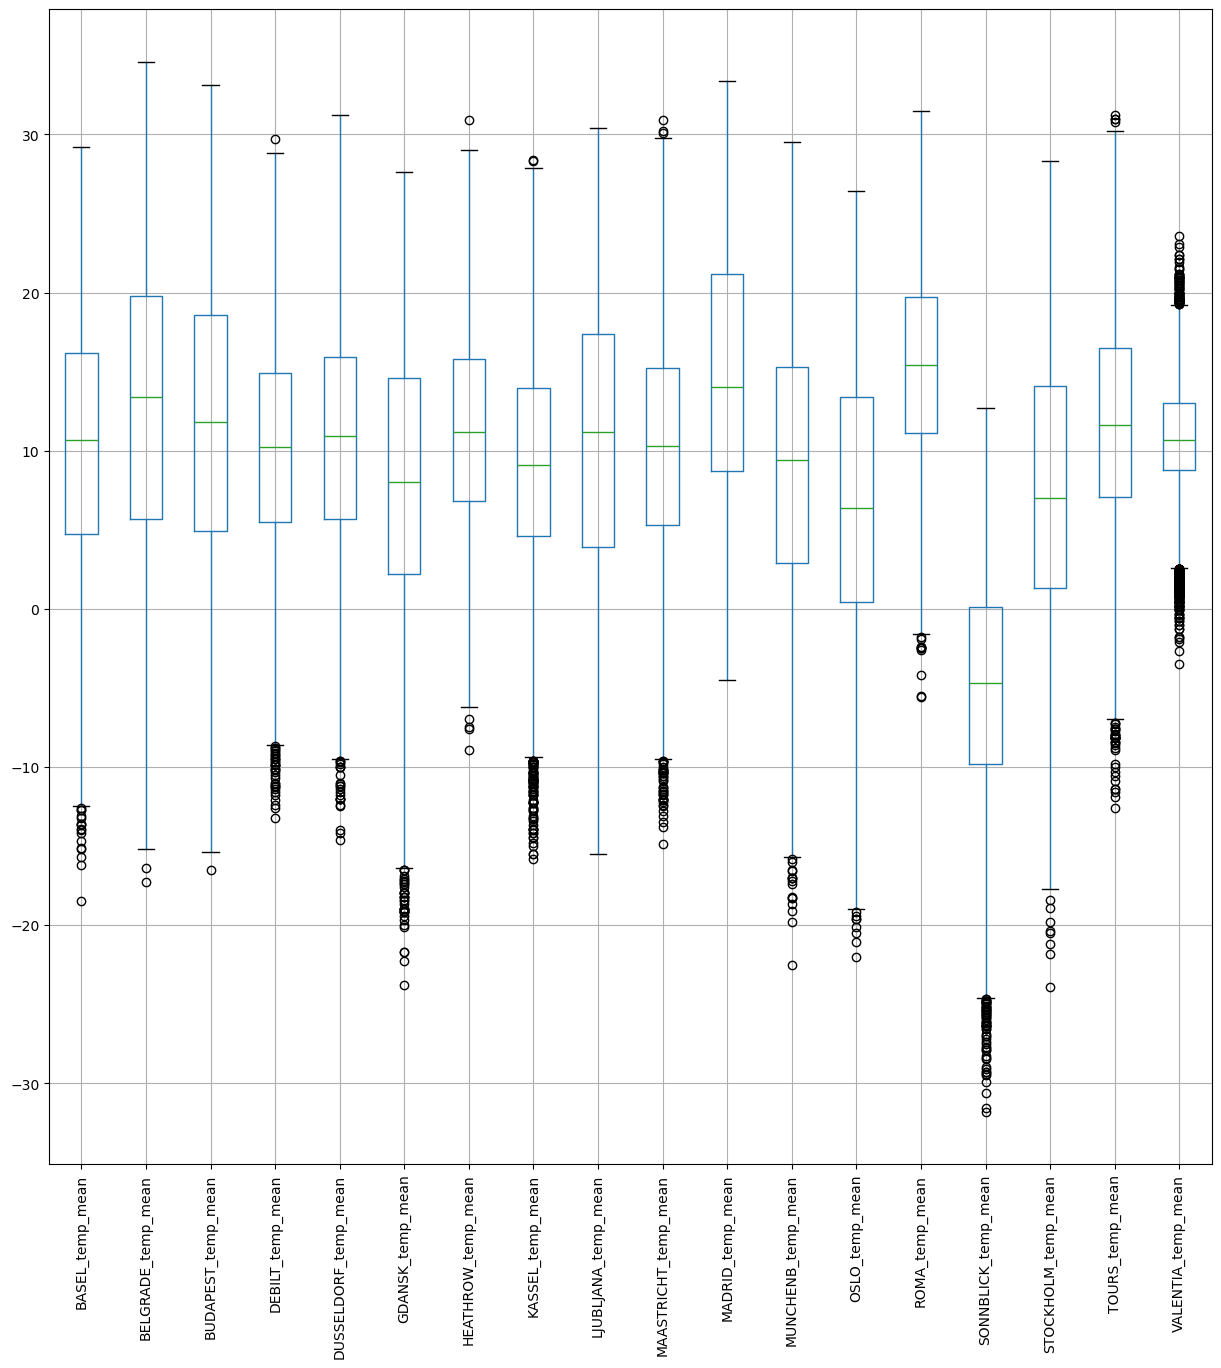

In [8]:
# Look at a whisker plot of the data to see variations in temperatures

notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)

In [9]:
# Reduce your dataset to a single year

dfyear = df[df['DATE'].astype(str).str.contains('2000')] #<-----INSERT YEAR HERE
dfyear

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
14610,20000101,1,2.9,-2.5,-4.9,6.1,4.2,-0.7,7.0,3.5,-4.8,5.6,5.4,1.7,-5.0,15.4,-15.2,-2.3,8.5,6.6
14611,20000102,1,3.6,-1.2,-3.6,7.3,6.5,-0.3,7.9,2.3,-0.9,6.2,5.0,1.9,-0.8,4.2,-13.7,1.3,7.9,9.6
14612,20000103,1,2.2,-1.0,-0.8,8.4,7.7,3.2,9.4,3.5,-0.3,6.8,3.5,-0.4,1.2,3.8,-9.2,0.8,8.1,8.6
14613,20000104,1,3.9,-1.3,-1.0,6.4,7.8,3.7,7.0,4.8,-3.6,7.3,4.3,3.8,2.1,6.0,-5.6,3.5,8.6,8.1
14614,20000105,1,6.0,-0.8,0.2,4.4,5.2,1.9,6.4,2.3,-3.0,5.2,0.6,5.3,-0.7,5.0,-7.6,-0.6,8.0,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971,20001227,12,5.2,12.3,4.4,-1.0,1.4,-1.7,2.2,1.4,6.4,-0.1,6.8,0.8,-3.2,13.1,-10.3,-0.3,6.7,1.4
14972,20001228,12,2.6,11.7,6.2,0.5,1.1,-0.7,-0.3,1.0,6.4,0.8,5.4,1.6,-3.5,11.3,-10.4,0.7,2.4,2.0
14973,20001229,12,1.1,7.4,4.6,0.6,0.3,-1.1,-2.2,-1.5,3.0,0.2,8.6,-0.7,-4.3,10.5,-10.5,0.3,3.3,2.4
14974,20001230,12,1.0,4.3,2.5,1.7,1.3,-3.0,-1.1,0.2,1.6,0.6,7.0,-0.4,-7.3,7.5,-13.9,1.2,1.2,3.7


In [10]:
dfyear.describe()

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
count,3.660000e+02,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.000067e+07,6.513661,11.786612,14.195902,12.694262,10.896995,11.449454,9.173497,11.582514,10.081967,12.181148,11.123497,15.006557,10.592896,7.801639,16.014754,-4.286885,8.497814,12.313115,10.758197
std,3.457653e+02,3.455958,6.455730,8.963638,8.408440,5.450340,5.852145,6.340916,5.155321,6.358591,7.858359,5.788827,7.130383,7.224441,6.646408,6.372385,6.422520,6.546361,5.611616,3.722074
min,2.000010e+07,1.000000,-6.800000,-9.900000,-6.600000,-2.800000,-2.600000,-10.400000,-2.200000,-6.500000,-7.900000,-3.400000,0.600000,-12.200000,-13.300000,1.700000,-23.500000,-10.100000,-2.000000,1.400000
25%,2.000040e+07,4.000000,6.825000,7.400000,5.950000,6.600000,6.925000,4.400000,7.600000,5.400000,6.325000,6.800000,9.400000,5.225000,2.900000,10.400000,-8.750000,3.025000,8.200000,7.900000
50%,2.000070e+07,7.000000,11.800000,15.300000,13.750000,10.800000,11.450000,9.900000,11.400000,10.050000,13.150000,11.050000,13.900000,10.800000,8.550000,16.050000,-3.700000,9.300000,11.600000,10.500000
75%,2.000098e+07,9.750000,17.100000,20.700000,19.300000,15.200000,15.775000,14.475000,15.875000,15.375000,18.300000,15.675000,21.400000,16.375000,13.175000,21.400000,0.575000,13.900000,17.175000,13.900000
max,2.000123e+07,12.000000,25.100000,32.800000,29.500000,25.900000,28.600000,22.200000,25.400000,25.400000,26.900000,26.900000,29.400000,26.800000,19.900000,29.500000,8.500000,21.700000,26.200000,19.500000


#### **3) Select a weather station**

In [11]:
# Pick which weather station you want to use. Below is a 3D visualization of the temperatures for that year.

In [12]:
# Drop the DATE and MONTH data as those numbers are not scaled with the rest.

notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [13]:
# Plot ALL weather data for all stations for a year 

# X = weather station
# Y = day of the year
# Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

#### **4) Temperature over the chosen year in the chosen weather station**

In [14]:
# We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
# We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

,index
0,0.01
1,0.02
2,0.03
3,0.04
4,0.05
...,...
361,3.62
362,3.63
363,3.64
364,3.65


In [15]:
n_rows = dfyear.shape[0]
n_rows

366

In [16]:
# This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
# Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['BASEL_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

In [17]:
X.shape, y.shape

((366, 2), (366, 1))

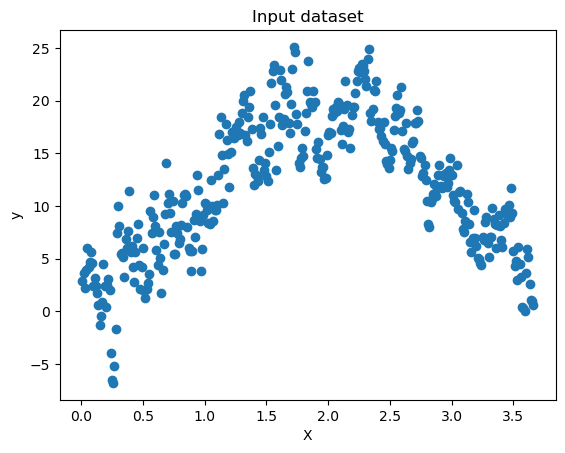

In [18]:
# Look at one year of temperature data over time

plt.scatter(x=index['index'], y=dfyear['BASEL_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [19]:
# What is the min temperature? (Note gradient descent is not actually finding this number)

dfyear['BASEL_temp_mean'].min()

-6.8

In [20]:
# What is the max temperature? (Note gradient descent is not actually finding this number)

dfyear['BASEL_temp_mean'].max()

25.1

#### **5) Loss function**

In [21]:
# This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [22]:
compute_cost(X,y)

array([90.24340164])

#### **6) Gradient descent function**

In [23]:
# This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [24]:
%%time
# This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
# You will need to adjust these numbers

num_iterations=10 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-10],[-5]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 0 ns
Wall time: 10.3 ms


In [25]:
theta

array([[-2.00213213],
       [ 6.20598635]])

In [26]:
# This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
# Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
fig.show()

C:\Users\andd0\AppData\Local\Temp\ipykernel_10760\2485981520.py:24: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



In [27]:
%%time
# theta range

theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 2.41 s
Wall time: 2.45 s


#### **7) Loss function (viz)**

In [28]:
# This figure shows the loss function.

# X = Theta0
# Y - Theta1
# Z = Loss
# Find where it is closest to 0 in X and Y!

# You can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [29]:
# Here is the same figure as above, with the line the loss function takes toward the minimum.

# X = Theta0
# Y - Theta1
# Z = Loss
# Black line = path of loss function over the iterations.
# Find where it is closest to 0 in X and Y!

# You can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

#### **8) Rerunning optimization + Loss function (viz)**

In [30]:
# Rerun the optimization above, but this time start closer to the objective!
# Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=10 #<---start with the same iterations as above
theta_init=np.array([[1],[1]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.1 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [31]:
# Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')

# The below line adds a graph of just the loss over iterations in a 2D plane

plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [32]:
# This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');

In [33]:
# How well does gradient descent converge? How much do you need to adjust between different weather stations and years?